In [43]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from zipfile import ZipFile
import fractions

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [44]:
#Load data - please don't change this part. 
df = pd.read_csv("Student Performance new.csv")
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.head(7)

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M
5,group B,associate's degree,standard,none,0.71,0.83,0.78,F
6,group B,some college,standard,completed,0.88,0.95,0.92,F


<h1>Part 1: Is There a Significant Difference Between Boys and Girls in Math? (10 pts) </h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion. Use your judgement on what makes a good piece of evidence.

Please format your justifications in a:
<ul>
<li>List
<li>of
<li>points.
</ul>

In [45]:
#Difference in math
f = df[df['sex']== 'F']
m = df[df['sex']== 'M']
print('Male mean: ', m['math percentage'].mean())
print('Female mean: ', f['math percentage'].mean())

Male mean:  0.6872821576763488
Female mean:  0.636332046332046


In [46]:
print('Females')
print(f['math percentage'].describe())
print('Males')
print(m['math percentage'].describe())

Females
count    518.000000
mean       0.636332
std        0.154915
min        0.000000
25%        0.540000
50%        0.650000
75%        0.740000
max        1.000000
Name: math percentage, dtype: float64
Males
count    482.000000
mean       0.687282
std        0.143563
min        0.270000
25%        0.590000
50%        0.690000
75%        0.790000
max        1.000000
Name: math percentage, dtype: float64


C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


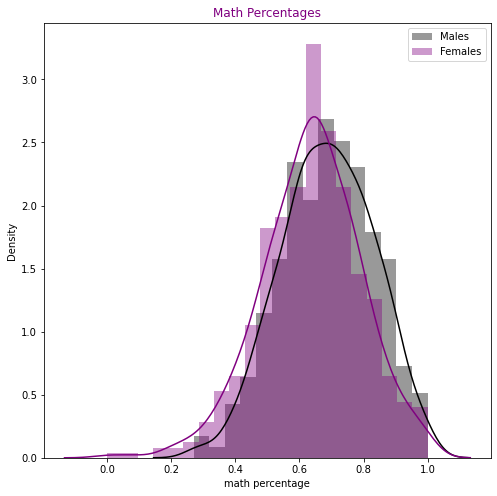

In [47]:
sns.distplot(m['math percentage'], color='black', label='Males')
sns.distplot(f['math percentage'], color='purple', label='Females')
thinkplot.Config()
plt.title('Math Percentages', color='purple')
plt.show()

<h2>Comparison of male to female math scores </h2>


<li> Generally, male scores are 4% higher than females scores. This is show in the 25%, 50%, and 75% scores above. 
<li> there are more girls than boys.
<li> Males have a min of 0 and females have a min of 27%
Overall, I would say there is not a significant difference. If the number were higher than 4% then there would be. 

<h1>Part 2: Is there a difference in math performance depending on Parental Education (15 pts)</h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion.

In [48]:
#Differnce in math
df["parental level of education"].value_counts().sort_values(ascending=False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [49]:
some_hs = df[df['parental level of education'] == 'some high school']
hs = df[df['parental level of education'] == 'high school']
some_college = df[df['parental level of education'] == 'some college']
associate = df[df['parental level of education'] == "associate's degree"]
bach = df[df['parental level of education'] == "bachelor's degree"]
master = df[df['parental level of education'] == "master's degree"]

print("Some High School:",some_hs['math percentage'].describe())
print("High School:",hs['math percentage'].describe())
print("Some College:",some_college['math percentage'].describe())
print("Associate's:",associate['math percentage'].describe())
print("Bachelor:",bach['math percentage'].describe())
print("Master Degree:",master['math percentage'].describe())

Some High School: count    179.000000
mean       0.634972
std        0.159280
min        0.000000
25%        0.530000
50%        0.650000
75%        0.740000
max        0.970000
Name: math percentage, dtype: float64
High School: count    196.000000
mean       0.621378
std        0.145397
min        0.080000
25%        0.537500
50%        0.630000
75%        0.720000
max        0.990000
Name: math percentage, dtype: float64
Some College: count    226.000000
mean       0.671283
std        0.143129
min        0.190000
25%        0.590000
50%        0.675000
75%        0.760000
max        1.000000
Name: math percentage, dtype: float64
Associate's: count    222.000000
mean       0.678829
std        0.151121
min        0.260000
25%        0.570000
50%        0.670000
75%        0.800000
max        1.000000
Name: math percentage, dtype: float64
Bachelor: count    118.000000
mean       0.693898
std        0.149438
min        0.290000
25%        0.610000
50%        0.680000
75%        0.790000


In [50]:
print(fractions.Fraction(len(some_college+associate+bach+master)/len(df)))
print((len(some_college+associate+bach+master)/len(df)))

5/8
0.625


Parental educations effect on math percentages
<li> there is about a 5% difference in means between parents that have not finished high school and ones that have master's degrees
<li> More notably, the median between those same categories has a difference of 8%.
<li> The min's also go up incrementally depending on parental education level (eg. min for 'some high school' is 0% and min for 'master's degree' is 40%)
<li> The categories with the highest maxes are 'some college', 'associate's degree', and 'bachelor's degree.' All 3 have kids with 100%. Where master degree's max is 95%.
<li> 62.5% of parents have been to college. 
<li> Overall, I would say that parental education does affect math percentages. This could be because parents that have been to college find it easier to help their children with their math homework. 

<h1>What appears to be the best predictor of writing performance? (10pts)</h1>

Justify your answer with about 2-3 sentences. Please also show the analysis that you did to draw your conclusion. There are multiple ways that you could come to a conclusion. 

In [51]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [52]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [53]:
df["parental level of education"].replace({"some high school": "1", "high school": "2", "some college": "3", "associate's degree": "4", "bachelor's degree": "5", "master's degree": "6"}, inplace=True)
df['parental level of education'].value_counts()

3    226
4    222
2    196
1    179
5    118
6     59
Name: parental level of education, dtype: int64

In [54]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [55]:
df["race/ethnicity"].replace({"group A": "1", "group B": "2", "group C": "3", "group D": "4", "group E": "5"}, inplace=True)
df['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [56]:
df['race/ethnicity']=df['race/ethnicity'].astype('int32')
df['parental level of education'].astype('int32')

0      5
1      3
2      6
3      4
4      3
      ..
995    6
996    2
997    2
998    3
999    3
Name: parental level of education, Length: 1000, dtype: int32

In [57]:
df['parental level of education']=df['parental level of education'].astype('int32')
df['parental level of education'].value_counts()

3    226
4    222
2    196
1    179
5    118
6     59
Name: parental level of education, dtype: int64

In [58]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [59]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [60]:
df['lunch']=(df['lunch']=='standard').astype(int)

In [61]:
#true is standard, false is reduced
df['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

In [62]:
df['test preparation course']=(df['test preparation course']=='completed').astype(int)

In [63]:
df['test preparation course'].value_counts()

0    642
1    358
Name: test preparation course, dtype: int64

In [64]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d


In [116]:
print('Test Prep:',thinkstats2.Corr(df["writing score percentage"], df["test preparation course"]))
print('Lunch:',thinkstats2.Corr(df["writing score percentage"], df["lunch"]))

print('Lunch CES:', CohenEffectSize(df['writing score percentage'], df['lunch']))
print('Test Prep CES:', CohenEffectSize(df['writing score percentage'], df['test preparation course']))
print('Race CES:', CohenEffectSize(df['writing score percentage'], df['race/ethnicity']))
print('Parent CES:', CohenEffectSize(df['writing score percentage'], df['parental level of education']))

Test Prep: 0.31294628448595596
Lunch: 0.2457686763842183
Lunch CES: 0.10006405459399637
Test Prep CES: 0.906574971036046
Race CES: -3.021372836836896
Parent CES: -2.3121664807371465


In [117]:
df.sort_values("writing score percentage")

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
59,3,1,0,0,0.00,0.17,0.10,F
596,2,2,0,0,0.30,0.24,0.15,M
327,1,3,0,0,0.28,0.23,0.19,M
76,5,1,1,0,0.30,0.26,0.22,M
980,2,2,0,0,0.08,0.24,0.23,F
...,...,...,...,...,...,...,...,...
970,4,5,1,0,0.89,1.00,1.00,F
106,4,6,1,0,0.87,1.00,1.00,F
957,4,6,1,0,0.92,1.00,1.00,F
916,5,5,1,1,1.00,1.00,1.00,M


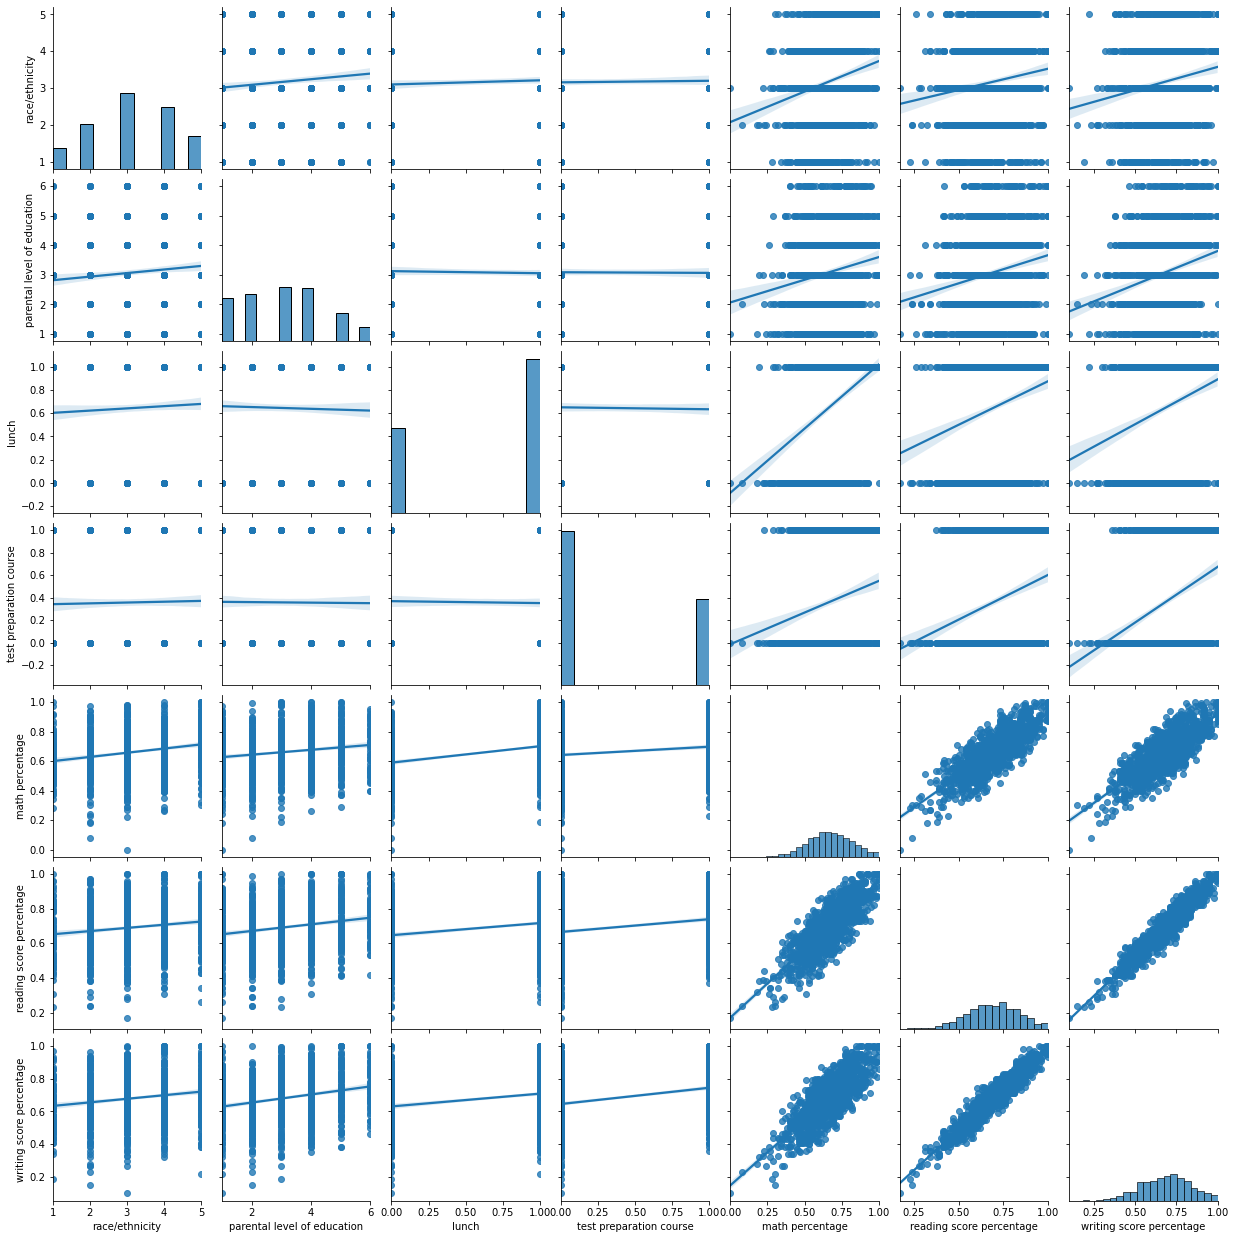

In [67]:
sns.pairplot(df, dropna=True, kind="reg")
plt.show()

<h2>Test Prep is the best indicator of writing percentages. There is a 94% cohen's effect size on reading score percentage which is classified as large. It is largest compared to every other indicator and by a fair margin.It also has the most linear relationship in the pairplot. 

<h1>How well can the population read? (25 pts)</h1>
<ul>
<li>The test designers tell us that a score over 55% on the reading test is a good cutoff for being functionally literate. Given that, what percentage of test takers qualify as literate? (5 pts)
<li>Assume that the test score results on this test reasonably represents the population. What is the expected mean score for the population at large, and what is the range in which you are 92% confident the population mean lies in? (15 pts)
<li>Please demonstrate your 92% confidence from above in a graphical format (5pts)
</ul>

In [69]:
#Reading
literate = df[df['reading score percentage'] > 0.55]
len(literate)/len(df)

0.824

In [70]:
df['reading score percentage'].mean()

0.6916900000000004

In [71]:
def simulateNormal(mu=0, sigma=1, n=100, m=10000, ciLow=5, ciHi=95):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    muList = [mu] * m
    stderr = mean_squared_error(means, muList, squared=False)
    return cdf, ci, stderr

Standard Error: 0.004627772751502144
Low CI: 0.6832099887496993
Hi CI: 0.6999682538856435


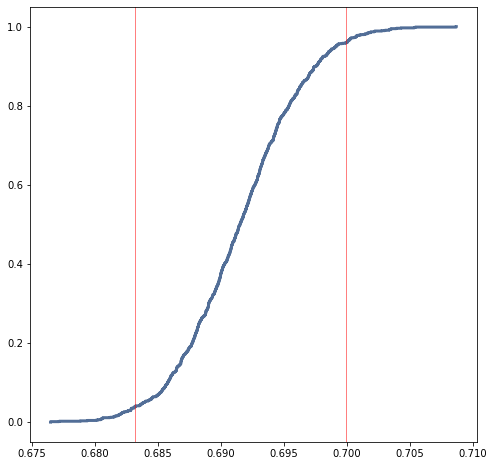

In [72]:
mu = df["reading score percentage"].mean()
sigma = df["reading score percentage"].std()
n = df["reading score percentage"].count()

cdf, ci, stderr = simulateNormal(mu=mu, sigma=sigma, n=n, m=1000, ciLow=4, ciHi=96)
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])
thinkplot.Cdf(cdf)
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(ci[1], color="red")
thinkplot.Config()

<h2><li>82.4% of test takers in this sample qualify as literate
<li> The expected mean of the population is 69.1% and we can be 92% confident that the mean will fall between 68.3% and 69.9%


<h1>What are the odds...(10 pts)</h1>

M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

In [73]:
#Probability
m = pd.DataFrame(index=["1994", "1996"])
m["prior"] = fractions.Fraction(1,2)
m

,prior
1994,1/2
1996,1/2


In [74]:
m["likelihood"] = fractions.Fraction(20,100), fractions.Fraction(14,100)
m

,prior,likelihood
1994,1/2,1/5
1996,1/2,7/50


In [75]:
m['unnorm'] = m['prior'] * m['likelihood']
m


,prior,likelihood,unnorm
1994,1/2,1/5,1/10
1996,1/2,7/50,7/100


In [76]:
prob_data = m['unnorm'].sum()
print("Unnorms:", prob_data)
probDirect = (20+14)/(200) 
print("Direct:", probDirect)

Unnorms: 17/100
Direct: 0.17


In [77]:
m['posterior'] = m['unnorm'] / prob_data
m

,prior,likelihood,unnorm,posterior
1994,1/2,1/5,1/10,10/17
1996,1/2,7/50,7/100,7/17


<h2>The probability that the yellow M&M came from the 1994 bag is 10/17 (58.8%).

<h1>911 Calls (10pts)</h1>
<ul>
<li>For this data, what is the mean time in between 911 calls. (Note: this will require some manipulation of data - Google "pandas date" and "date difference in minutes" as a starting point. It is not super complex, apx 2-4 lines or so) (5pts)
<li>What is a good distribution to model this? (5pts)
</ul>

In [78]:
#read file - Don't change this part. 
calls = ""
with ZipFile('911_2.csv.zip') as myzip:
    with myzip.open('911_2.csv') as myfile:
       calls = pd.read_csv(myfile)
calls.head(10)

,zip,title,timeStamp,twp
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10,NEW HANOVER
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29,HATFIELD TOWNSHIP
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39,NORRISTOWN
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47,NORRISTOWN
4,NaN,EMS: DIZZINESS,2015-12-10 16:56,LOWER POTTSGROVE
5,19446.0,EMS: HEAD INJURY,2015-12-10 15:39,LANSDALE
6,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46,HORSHAM
7,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17,SKIPPACK
8,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51,LOWER SALFORD
9,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35,PLYMOUTH


In [79]:
import datetime as dt

In [107]:
#Generate Time Between Calls
fmt = '%Y-%m-%d %H:%M:%S'
new_fmt = '%M:%S'
calls['timeStamp'] = pd.to_datetime(calls.timeStamp, format=fmt)
calls.sort_values('timeStamp', ascending=True)
calls['delta'] = (calls['timeStamp']-calls['timeStamp'].shift()).fillna(pd.Timedelta(minutes=0))
calls.head(20)

,zip,title,timeStamp,twp,delta,ans
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,0 days 00:00:00,0
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,0 days 00:19:00,19
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,-1 days +21:10:00,1270
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,0 days 02:08:00,128
4,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,0 days 00:09:00,9
5,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:00,LANSDALE,-1 days +22:43:00,1363
6,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:00,HORSHAM,0 days 01:07:00,67
7,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:00,SKIPPACK,-1 days +23:31:00,1411
8,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:00,LOWER SALFORD,0 days 00:34:00,34
9,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:00,PLYMOUTH,0 days 00:44:00,44


In [115]:
#Generate Time Between Calls
fmt = '%Y-%m-%d %H:%M:%S'
new_fmt = '%M:%S'
calls['timeStamp'] = pd.to_datetime(calls.timeStamp, format=fmt)
calls['delta'] = (calls['timeStamp']-calls['timeStamp'].shift()).fillna(pd.timedelta(unit="m"))
calls.sort_values('timeStamp', ascending=True)
calls.head(20)

AttributeError: module 'pandas' has no attribute 'timedelta'

In [81]:
calls['ans'] = calls['delta'].apply(lambda x: x  / np.timedelta64(1,'m')).astype('int64') % (24*60)

In [82]:
calls['ans'].mean()

305.3392080443452

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ans', ylabel='Density'>

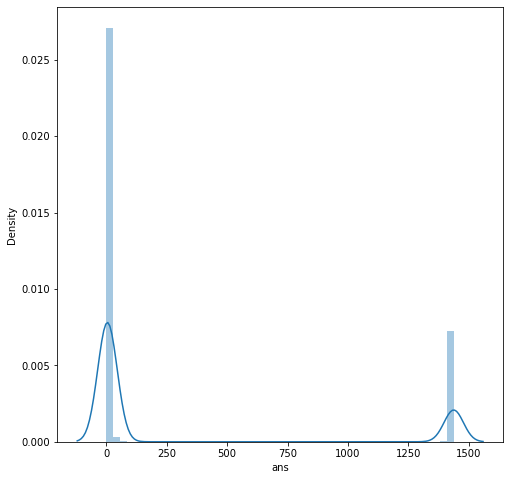

In [83]:
sns.distplot(calls['ans'])